<a href="https://colab.research.google.com/github/Csillag61/AIX360/blob/master/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
# Connecting Google Drive
from google.colab import drive
drive.mount("/content/drive")

# Changing work folder
%cd /content/drive/MyDrive/Colab Notebooks/pandas

# Uploading dataset
df = pd.read_csv("e_commerce_dataset_updated.csv")
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/pandas


,order_date,time,aging,customer_id,gender,device_type,customer_login_type,product_category,product,sales,quantity,discount,profit,shipping_cost,order_priority,payment_method
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card
2,2018-11-08,8:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card


In [25]:
print(df.shape)

(51290, 16)


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_date           51290 non-null  object 
 1   time                 51290 non-null  object 
 2   aging                51289 non-null  float64
 3   customer_id          51290 non-null  int64  
 4   gender               51290 non-null  object 
 5   device_type          51290 non-null  object 
 6   customer_login_type  51290 non-null  object 
 7   product_category     51290 non-null  object 
 8   product              51290 non-null  object 
 9   sales                51289 non-null  float64
 10  quantity             51288 non-null  float64
 11  discount             51289 non-null  float64
 12  profit               51290 non-null  float64
 13  shipping_cost        51289 non-null  float64
 14  order_priority       51288 non-null  object 
 15  payment_method       51290 non-null 

In [27]:
print(df.dtypes)

order_date              object
time                    object
aging                  float64
customer_id              int64
gender                  object
device_type             object
customer_login_type     object
product_category        object
product                 object
sales                  float64
quantity               float64
discount               float64
profit                 float64
shipping_cost          float64
order_priority          object
payment_method          object
dtype: object


In [28]:
df.describe()

,aging,customer_id,sales,quantity,discount,profit,shipping_cost
count,51289.000000,51290.000000,51289.000000,51288.000000,51289.000000,51290.000000,51289.000000
mean,5.255035,58155.758764,152.340872,2.502983,0.303821,70.407226,7.041557
std,2.959948,26032.215826,66.495419,1.511859,0.131027,48.729488,4.871745
min,1.000000,10000.000000,33.000000,1.000000,0.100000,0.500000,0.100000
25%,3.000000,35831.250000,85.000000,1.000000,0.200000,24.900000,2.500000
50%,5.000000,61018.000000,133.000000,2.000000,0.300000,59.900000,6.000000
75%,8.000000,80736.250000,218.000000,4.000000,0.400000,118.400000,11.800000
max,10.500000,99999.000000,250.000000,5.000000,0.500000,167.500000,16.800000


In [29]:
print(df.isna().sum())


order_date             0
time                   0
aging                  1
customer_id            0
gender                 0
device_type            0
customer_login_type    0
product_category       0
product                0
sales                  1
quantity               2
discount               1
profit                 0
shipping_cost          1
order_priority         2
payment_method         0
dtype: int64


In [30]:
print(df.isna().sum() / df.shape[0] * 100)


order_date             0.000000
time                   0.000000
aging                  0.001950
customer_id            0.000000
gender                 0.000000
device_type            0.000000
customer_login_type    0.000000
product_category       0.000000
product                0.000000
sales                  0.001950
quantity               0.003899
discount               0.001950
profit                 0.000000
shipping_cost          0.001950
order_priority         0.003899
payment_method         0.000000
dtype: float64


Since the percentage of missing values does not exceed 0.004%, we can remove the rows with missing values:

In [31]:
ecom = df.dropna()



In [32]:
ecom.describe()


,aging,customer_id,sales,quantity,discount,profit,shipping_cost
count,51282.000000,51282.000000,51282.000000,51282.000000,51282.000000,51282.000000,51282.000000
mean,5.255187,58159.746656,152.337350,2.502964,0.303838,70.401796,7.041166
std,2.960073,26031.763189,66.492468,1.511834,0.131025,48.728131,4.871685
min,1.000000,10000.000000,33.000000,1.000000,0.100000,0.500000,0.100000
25%,3.000000,35841.500000,85.000000,1.000000,0.200000,24.900000,2.500000
50%,5.000000,61021.500000,133.000000,2.000000,0.300000,59.900000,6.000000
75%,8.000000,80739.250000,218.000000,4.000000,0.400000,118.400000,11.800000
max,10.500000,99999.000000,250.000000,5.000000,0.500000,167.500000,16.800000


Check for duplicates

In [33]:
# Checking for duplicates in data
duplicate_rows = ecom.duplicated()
print(duplicate_rows)
print(f"Duplicates: {duplicate_rows.sum()}")


0        False
1        False
2        False
3        False
4        False
         ...  
51285    False
51286    False
51287    False
51288    False
51289    False
Length: 51282, dtype: bool
Duplicates: 0


convert the order_date column to the datetime type

In [34]:
#df.drop_duplicates()

In [36]:
# Convert the date column to datetime
ecom["order_date"] = pd.to_datetime(ecom["order_date"])
ecom.info()


<class 'pandas.core.frame.DataFrame'>
Index: 51282 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_date           51282 non-null  datetime64[ns]
 1   time                 51282 non-null  object        
 2   aging                51282 non-null  float64       
 3   customer_id          51282 non-null  int64         
 4   gender               51282 non-null  object        
 5   device_type          51282 non-null  object        
 6   customer_login_type  51282 non-null  object        
 7   product_category     51282 non-null  object        
 8   product              51282 non-null  object        
 9   sales                51282 non-null  float64       
 10  quantity             51282 non-null  float64       
 11  discount             51282 non-null  float64       
 12  profit               51282 non-null  float64       
 13  shipping_cost        51282 non-null 

The pd.to_numeric() method converts values to a numeric format. For example, for calculations or model building, numeric values stored as text need to be converted to int or float formats.

Data Analysis and Visualization


In [37]:
gender_segmentation = ecom.groupby("gender")["customer_id"].count()
print(gender_segmentation)


gender
Female    23150
Male      28132
Name: customer_id, dtype: int64


In [38]:
# Group by 'gender' and the date column, and calculate the sum of 'sales' for each group
time_series_data = ecom.groupby(["gender", "order_date"])["sales"].sum().reset_index()
time_series_data.head()


,gender,order_date,sales
0,Female,2018-01-01,5222.0
1,Female,2018-01-02,6310.0
2,Female,2018-01-03,6854.0
3,Female,2018-01-04,6009.0
4,Female,2018-01-05,5692.0


In [39]:
# Create time series plots by gender
genders = time_series_data["gender"].unique()


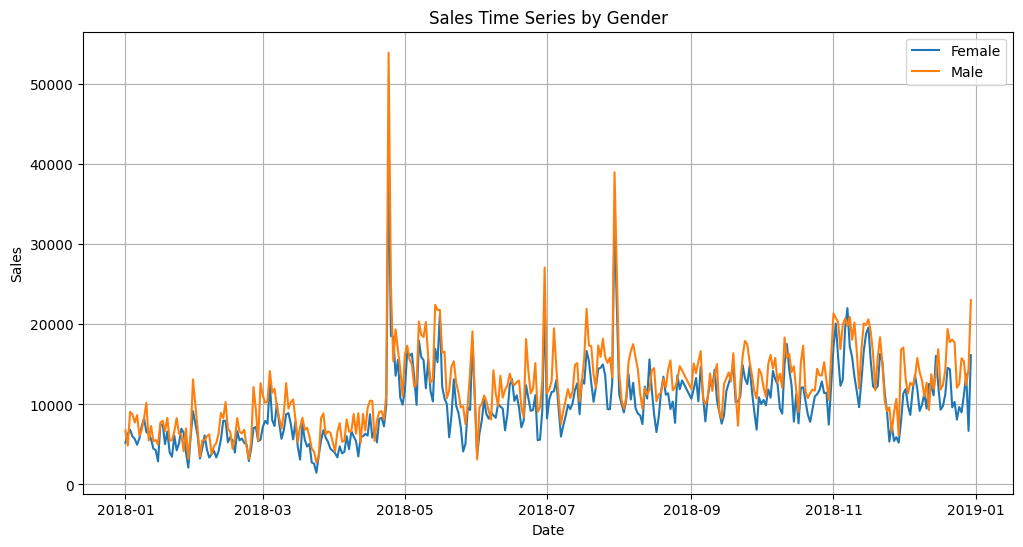

In [40]:
plt.figure(figsize=(12, 6))
for gender in genders:
    gender_data = time_series_data[time_series_data["gender"] == gender]
    plt.plot(gender_data["order_date"], gender_data["sales"], label=gender)

plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Time Series by Gender")
plt.legend()
plt.grid(True)
plt.show()


average sales by gender:

In [41]:
purchasing_behavior = ecom.groupby("gender")["sales"].mean()
print(purchasing_behavior)


gender
Female    151.365961
Male      153.136713
Name: sales, dtype: float64


In [42]:
purchasing_behavior_profit = ecom.groupby("gender")["profit"].mean()
print(purchasing_behavior_profit)


gender
Female    69.987058
Male      70.743086
Name: profit, dtype: float64


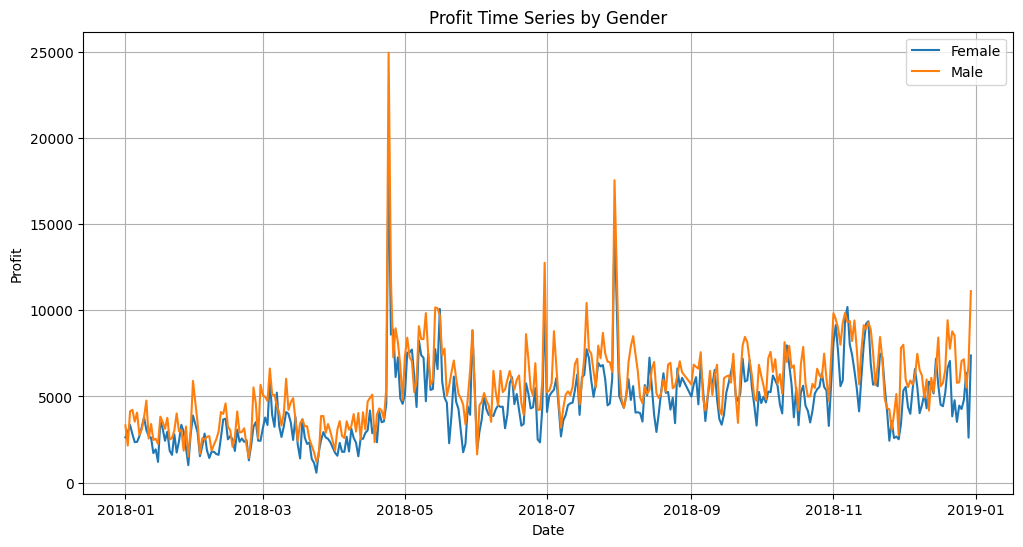

In [43]:
# Group by 'gender' and the date column, and calculate the sum of 'profit' for each group
time_series_data_profit = (
    ecom.groupby(["gender", "order_date"])["profit"].sum().reset_index()
)
plt.figure(figsize=(12, 6))
for gender in genders:
    gender_data = time_series_data_profit[time_series_data["gender"] == gender]
    plt.plot(gender_data["order_date"], gender_data["profit"], label=gender)

plt.xlabel("Date")
plt.ylabel("Profit")
plt.title("Profit Time Series by Gender")
plt.legend()
plt.grid(True)
plt.show()


In [44]:
purchasing_behavior_quantity = ecom.groupby("gender")["quantity"].mean()
print(purchasing_behavior_quantity)


gender
Female    2.550929
Male      2.463494
Name: quantity, dtype: float64


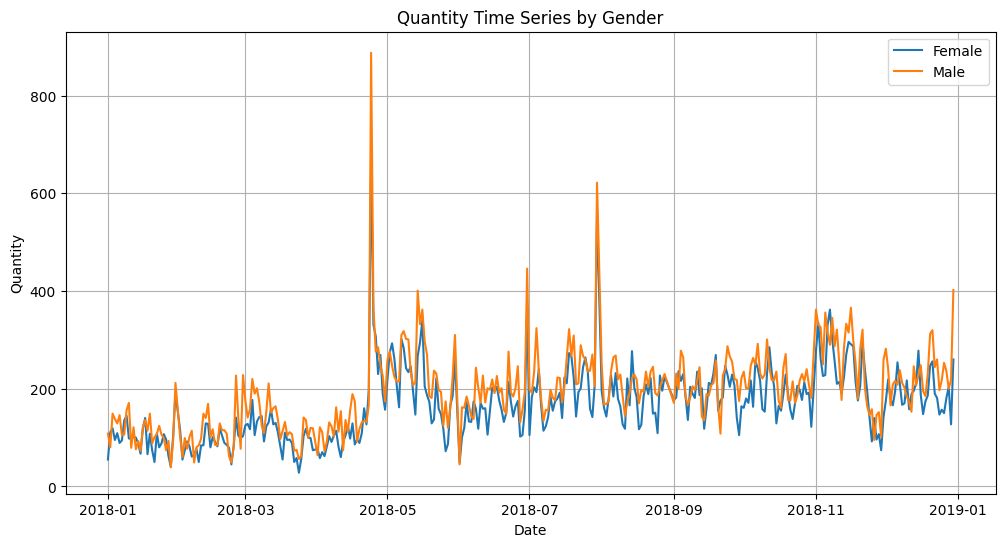

In [45]:
# Group by 'gender' and the date column, and calculate the sum of 'quantity' for each group
time_series_data_qty = (
    ecom.groupby(["gender", "order_date"])["quantity"].sum().reset_index()
)
plt.figure(figsize=(12, 6))
for gender in genders:
    gender_data = time_series_data_qty[time_series_data_qty["gender"] == gender]
    plt.plot(gender_data["order_date"], gender_data["quantity"], label=gender)

plt.xlabel("Date")
plt.ylabel("Quantity")
plt.title("Quantity Time Series by Gender")
plt.legend()
plt.grid(True)
plt.show()


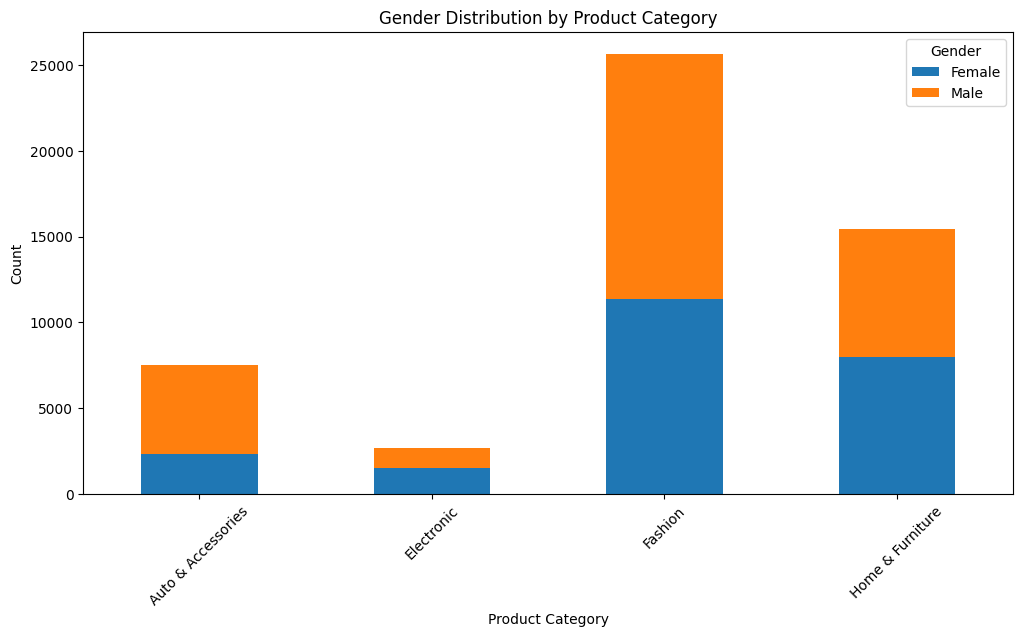

In [46]:
gender_category_counts = ecom.groupby(["product_category", "gender"]).size().unstack()

# Create a bar plot
gender_category_counts.plot(kind="bar", stacked=True, figsize=(12, 6))

# Customize the plot
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.title("Gender Distribution by Product Category")
plt.legend(title="Gender", loc="upper right", labels=["Female", "Male"])
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [47]:
purchasing_behavior = ecom.groupby("device_type")["sales"].mean()
print(purchasing_behavior)


device_type
Mobile    154.002187
Web       152.209474
Name: sales, dtype: float64


In [48]:
# Group by 'device' and the date column, and calculate the sum of 'sales' for each group
time_series_data = (
    ecom.groupby(["device_type", "order_date"])["sales"].sum().reset_index()
)


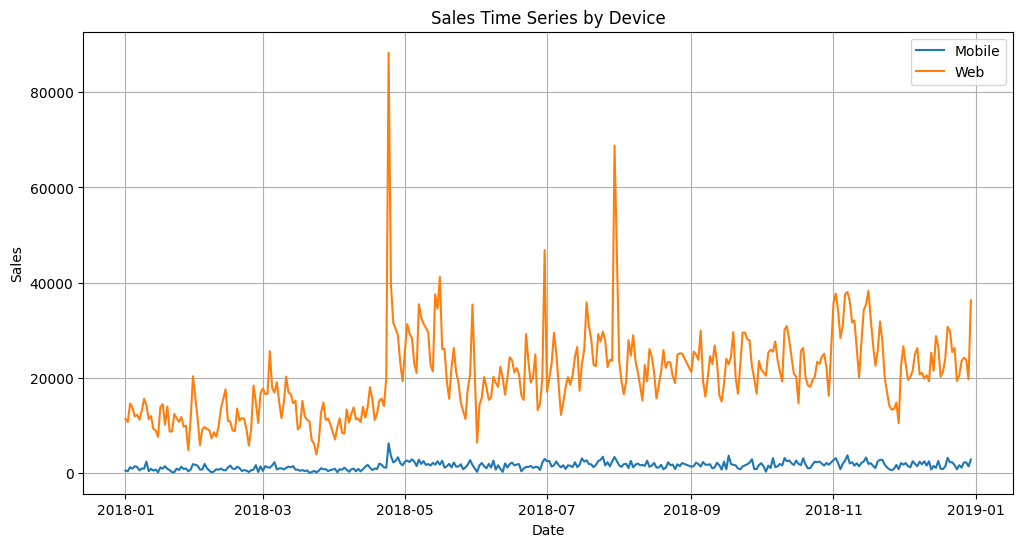

In [49]:
# Create time series plots by 'device'
devices = time_series_data["device_type"].unique()
plt.figure(figsize=(12, 6))
for device in devices:
    device_data = time_series_data[time_series_data["device_type"] == device]
    plt.plot(device_data["order_date"], device_data["sales"], label=device)

plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Time Series by Device")
plt.legend()
plt.grid(True)
plt.show()


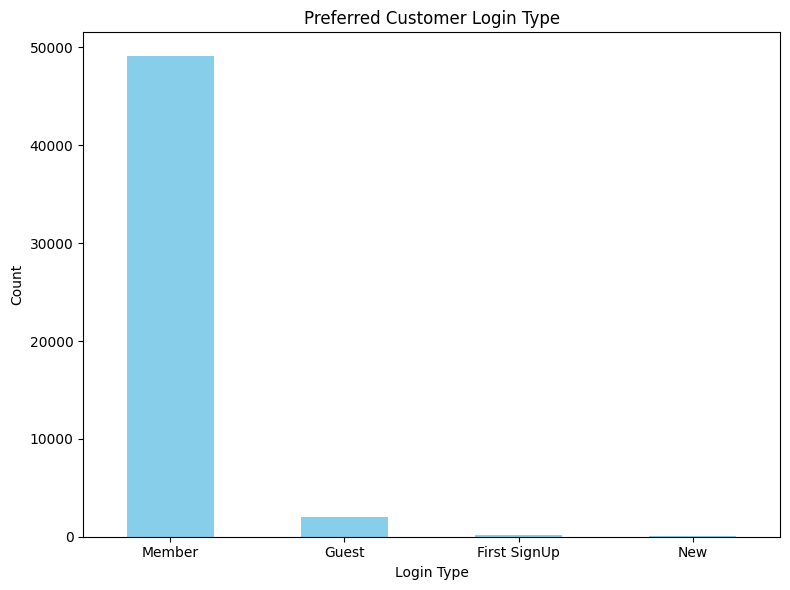

In [50]:
# Group the data by 'customer_login_type' and count the occurrences of each type
login_type_counts = ecom["customer_login_type"].value_counts()

# Create a bar graph
plt.figure(figsize=(8, 6))
login_type_counts.plot(kind="bar", color="skyblue")
plt.title("Preferred Customer Login Type")
plt.xlabel("Login Type")
plt.ylabel("Count")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the graph
plt.show()


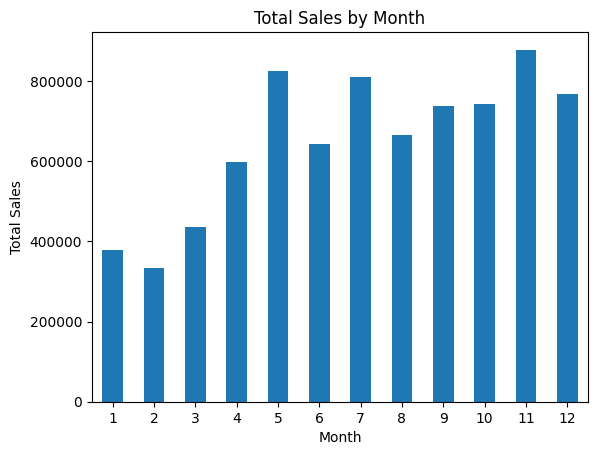

In [51]:
# Extract month, day of the week, and hour information from the 'order_date' column
ecom["order_date"] = pd.to_datetime(ecom["order_date"])

ecom["month"] = ecom["order_date"].dt.month
ecom["day_of_week"] = ecom["order_date"].dt.dayofweek  # Monday=0, Sunday=6


# Total sales by month
monthly_sales = ecom.groupby("month")["sales"].sum()
monthly_sales.plot(
    kind="bar", xlabel="Month", ylabel="Total Sales", title="Total Sales by Month"
)
plt.xticks(rotation=0)
plt.show()


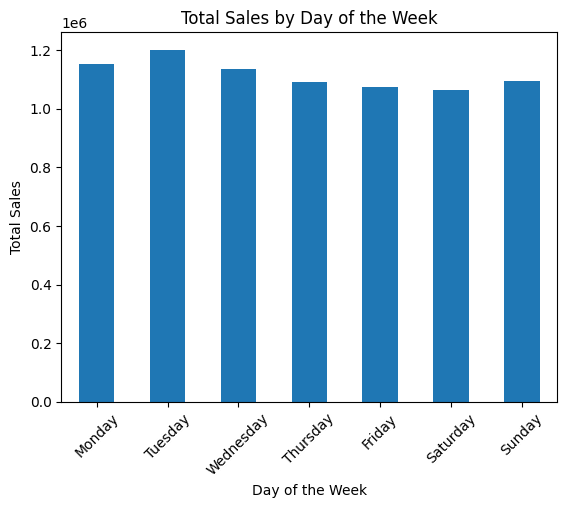

In [52]:
# Total sales by day of the week
day_of_week_sales = ecom.groupby("day_of_week")["sales"].sum()
day_of_week_sales.index = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]
day_of_week_sales.plot(
    kind="bar",
    xlabel="Day of the Week",
    ylabel="Total Sales",
    title="Total Sales by Day of the Week",
)
plt.xticks(rotation=45)
plt.show()


In [53]:
# Calculate total sales and profit
total_sales = ecom["sales"].sum()
total_profit = ecom["profit"].sum()

print(f"Total Sales: ${total_sales:.2f}")
print(f"Total Profit: ${total_profit:.2f}")


Total Sales: $7812164.00
Total Profit: $3610344.90


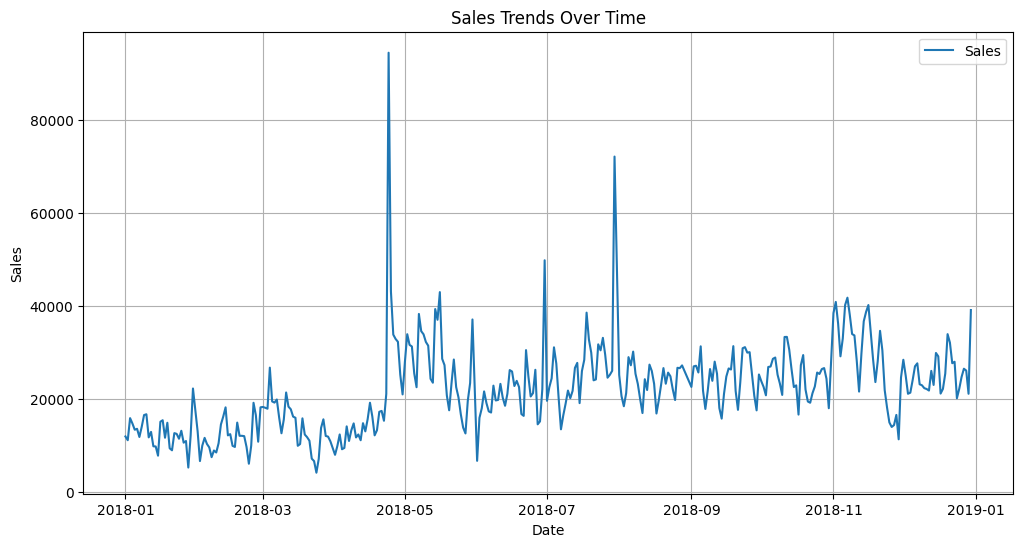

In [54]:
# Analyze sales trends over time
sales_over_time = ecom.groupby("order_date")["sales"].sum()

# Plot the sales trend
plt.figure(figsize=(12, 6))
plt.plot(sales_over_time.index, sales_over_time.values, label="Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Trends Over Time")
plt.legend()
plt.grid(True)
plt.show()


In [55]:
# Identify the top-selling products and product categories
top_products = ecom.groupby("product")["sales"].sum().nlargest(10)
top_categories = ecom.groupby("product_category")["sales"].sum().nlargest(5)

print("\nTop Selling Products:")
print(top_products)

print("\nTop Selling Product Categories:")
print(top_categories)



Top Selling Products:
product
T - Shirts       578336.0
Titak watch      531468.0
Running Shoes    522144.0
Jeans            508376.0
Formal Shoes     496503.0
Shirts           457072.0
Fossil Watch     370788.0
Towels           351348.0
Sofa Covers      332424.0
Bed Sheets       325151.0
Name: sales, dtype: float64

Top Selling Product Categories:
product_category
Fashion               4345914.0
Home & Furniture      1975831.0
Auto & Accessories    1095681.0
Electronic             394738.0
Name: sales, dtype: float64


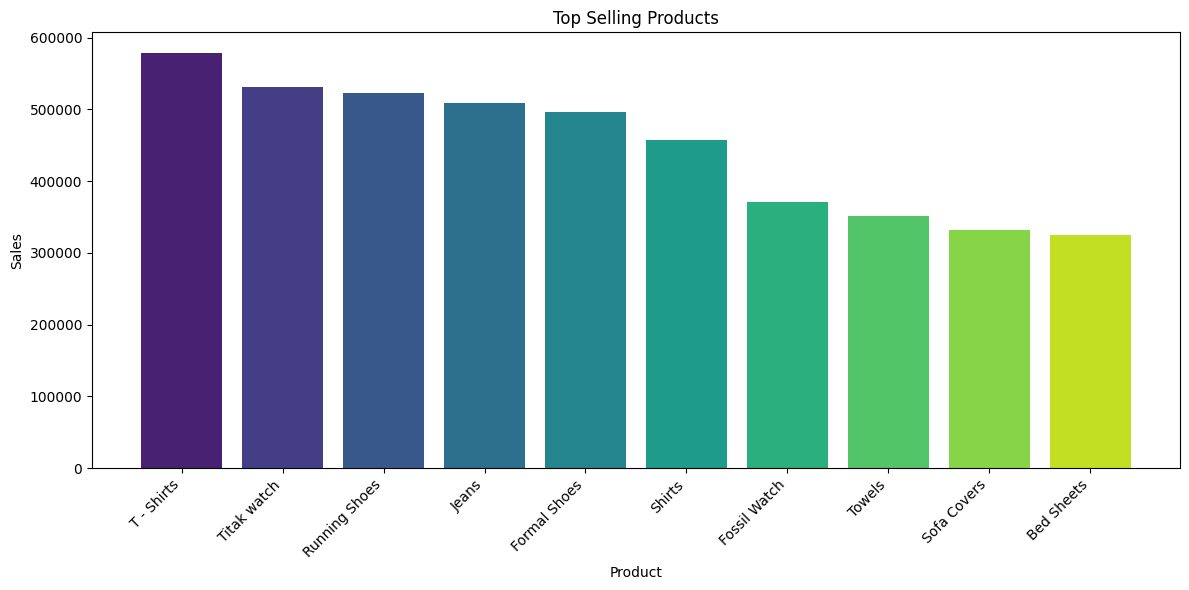

In [56]:
# Define a color palette for the bars
colors = sns.color_palette("viridis", len(top_products))

# Create bar graphs for top-selling products with different colors
plt.figure(figsize=(12, 6))
plt.bar(top_products.index, top_products.values, color=colors)
plt.xlabel("Product")
plt.ylabel("Sales")
plt.title("Top Selling Products")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


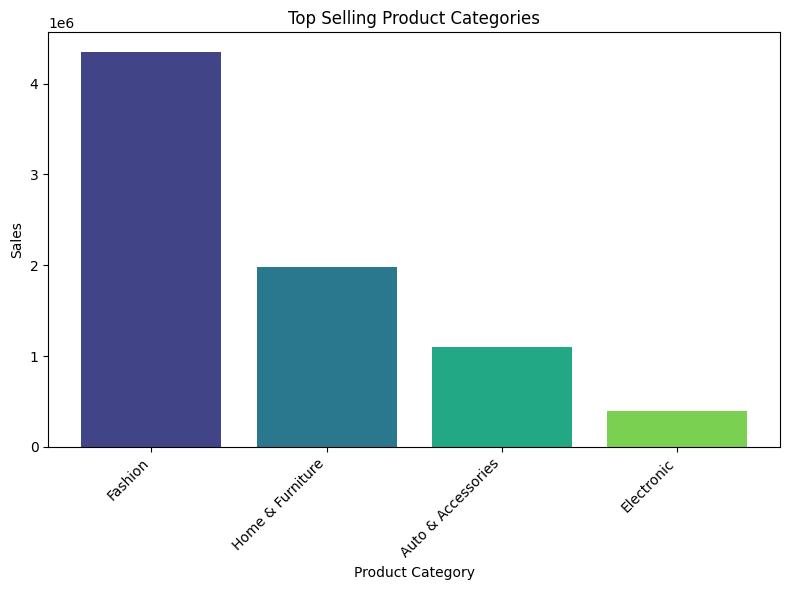

In [57]:
# Define a color palette for the bars
colors = sns.color_palette("viridis", len(top_categories))

# Create bar graphs for top-selling product categories with different colors
plt.figure(figsize=(8, 6))
plt.bar(top_categories.index, top_categories.values, color=colors)
plt.xlabel("Product Category")
plt.ylabel("Sales")
plt.title("Top Selling Product Categories")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Customer Behavior Analysis
- average order processing time and its impact on sales:
- how discounts are related to sales
- customer behavior based on payment methods


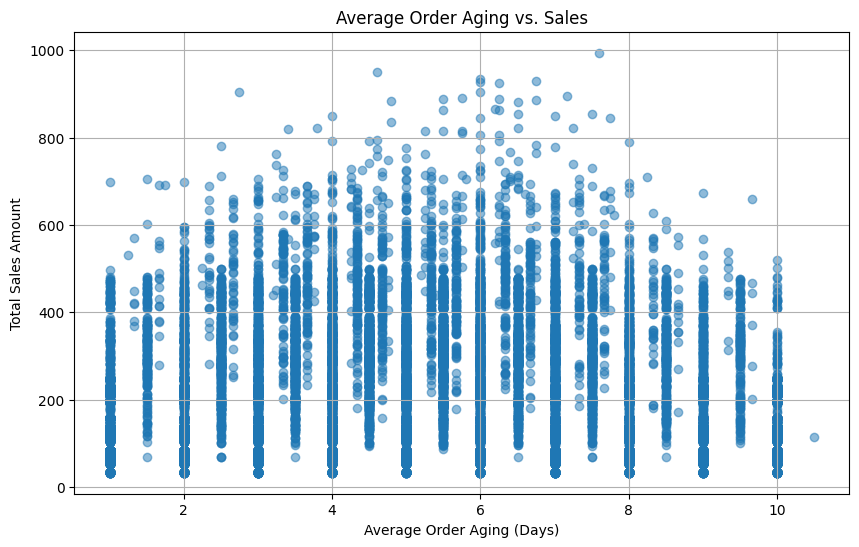

In [58]:
# Analyze the average order aging period and its impact on sales
avg_order_aging = ecom.groupby("customer_id")["aging"].mean()
avg_order_aging_sales = ecom.groupby("customer_id")["sales"].sum()

# Create a scatter plot to visualize the relationship between aging and sales
plt.figure(figsize=(10, 6))
plt.scatter(avg_order_aging, avg_order_aging_sales, alpha=0.5)
plt.xlabel("Average Order Aging (Days)")
plt.ylabel("Total Sales Amount")
plt.title("Average Order Aging vs. Sales")
plt.grid(True)
plt.show()


In [60]:
ecom.head()

,order_date,time,aging,customer_id,gender,device_type,customer_login_type,product_category,product,sales,quantity,discount,profit,shipping_cost,order_priority,payment_method,month,day_of_week
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card,1,1
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card,7,1
2,2018-11-08,8:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card,11,3
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card,4,2
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card,8,0


In [61]:
# Create a DataFrame from discount_sales to use hue
# Optional: Categorize discounts into bins or labels
ecom['discount_level'] = pd.cut(
    ecom['discount'],
    bins=[0, 0.1, 0.2, 0.3, 0.4, 1.0],
    labels=['0-10%', '11-20%', '21-30%', '31-40%', '41%+']
)


In [62]:
df_discount_summary = (
    ecom.groupby(['product_category', 'discount'])['profit']
    .sum()
    .reset_index()
)


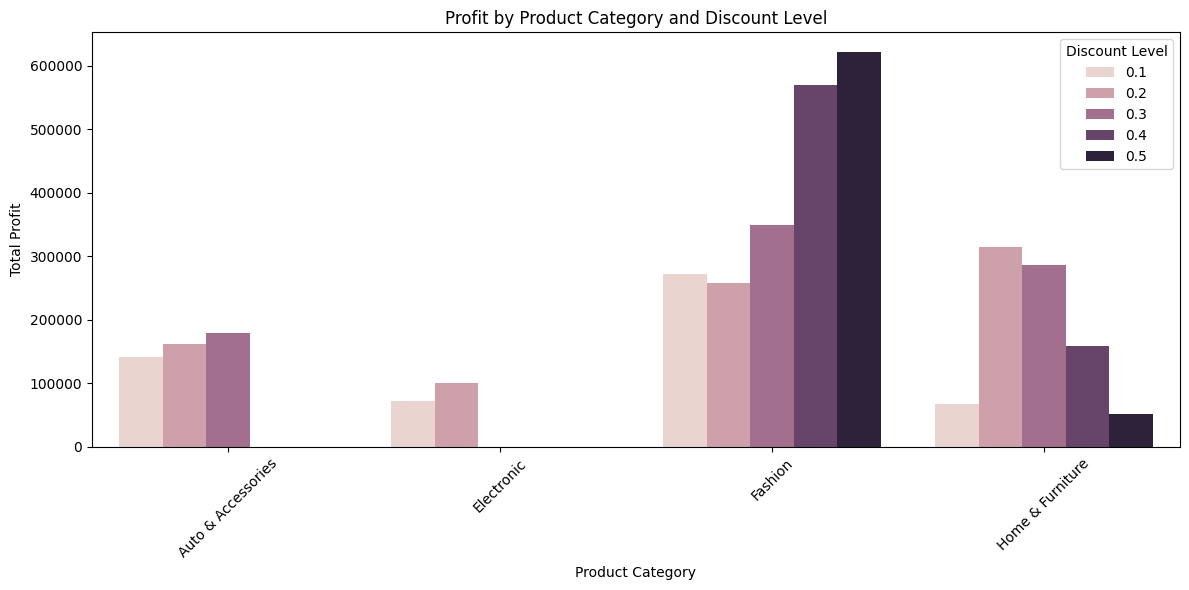

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=df_discount_summary, x='product_category', y='profit', hue='discount')
plt.xticks(rotation=45)
plt.title("Profit by Product Category and Discount Level")
plt.xlabel("Product Category")
plt.ylabel("Total Profit")
plt.legend(title="Discount Level")
plt.tight_layout()
plt.show()


Total Quantity Sold by Discount Bin

In [66]:
# Bin discount percentages into categories
ecom['discount_bin'] = pd.cut(
    ecom['discount'],
    bins=[0, 0.1, 0.2, 0.3, 0.4, 1.0],
    labels=['0-10%', '11-20%', '21-30%', '31-40%', '41%+']
)


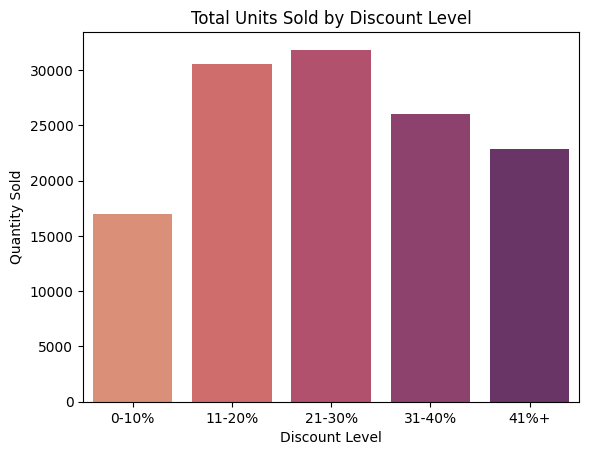

In [67]:
discount_sales = (
    ecom.groupby('discount_bin')['quantity']
    .sum()
    .reset_index()
    .sort_values(by='quantity', ascending=False)
)

sns.barplot(data=discount_sales, x='discount_bin', y='quantity', palette='flare')
plt.title("Total Units Sold by Discount Level")
plt.xlabel("Discount Level")
plt.ylabel("Quantity Sold")
plt.show()


Scatterplot for Continuous Discount vs Sales

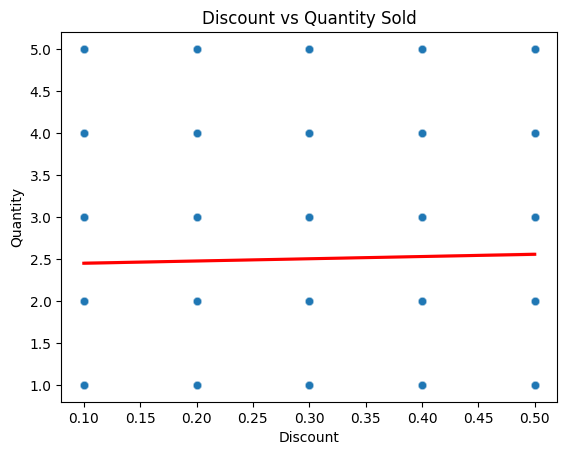

In [68]:
sns.scatterplot(data=ecom, x='discount', y='quantity', alpha=0.3)
sns.regplot(data=ecom, x='discount', y='quantity', scatter=False, color='red')
plt.title("Discount vs Quantity Sold")
plt.xlabel("Discount")
plt.ylabel("Quantity")
plt.show()
